In [37]:
#based on chap6

In [38]:
#using (linear) Ordinary Least-squares Regression

In [ ]:
#figure out how to join both indices so that no issues
#get number of records aroubd 3500 rather than 1200
#check how to get model.beta thing and plot

In [39]:
import pandas as pd
import numpy as np

In [40]:
from urllib import urlretrieve


In [41]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url,'./data/es.txt')
urlretrieve(vs_url,'./data/vs.txt')
!ls -o ./data/*txt

-rw-r--r-- 1 cassandra 688500 Okt 10 11:14 ./data/es.txt
-rw-r--r-- 1 cassandra 363485 Okt 10 11:14 ./data/vs.txt


In [42]:
#EURO STOXX 50
#Two cleaning steps
##No need to consider additional header lines
##Apparently from December 27,2011 onwards , the dataset has an additional semicolon at the end of each data row

In [43]:
#read whole data set and remove all blanks
lines = open('./data/es.txt','r').readlines()
lines = [line.replace(' ','') for line in lines]

In [44]:
#inspect first few lines
lines[0:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [45]:
for line in lines[3883:3890]:
    print line[41:]

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [46]:
#to make data set easier to import 
#1. generate new text file

#2. delete un needed header lines
#3. write appropriate new header line in the new file
#4. add a helper column DEL(to catch the trailing semicolons)
#5. write all data rows to the new file
#6. Import the data set and delete the helper column

In [47]:
#open new file
new_file=open('./data/es50.txt','w')
#write corrected third line of the original file as first line of new file
new_file.writelines('date'+lines[3][:-1] + ';DEL'+lines[3][-1])
#write remaining lines of the original file
new_file.writelines(lines[4:])
new_file.close()

In [113]:
new_lines = open('./data/es50.txt','r').readlines()

In [114]:
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [115]:
#dayfirst = True ensures that dates are ad DD/MM 
es = pd.read_csv('./data/es50.txt',index_col=0,parse_dates=True,sep=';',dayfirst=True)

In [116]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [117]:
#now delete the helper column
del es['DEL']

In [118]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [119]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
date,,,,,,,,
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [120]:
es = es[0:4357]

In [121]:
es.shape

(4357, 8)

In [135]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1986-12-31 to 2003-11-07
Data columns (total 8 columns):
SX5P    4357 non-null float64
SX5E    4357 non-null float64
SXXP    4357 non-null float64
SXXE    4357 non-null float64
SXXF    4357 non-null float64
SXXA    4357 non-null float64
DK5F    4357 non-null float64
DKXF    4357 non-null float64
dtypes: float64(8)
memory usage: 306.4 KB


In [136]:
vs.shape

(4357, 9)

In [137]:
#could directly use the following
# cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
# 'SXXA', 'DK5F', 'DKXF']
# es = pd.read_csv(es_url, index_col=0, parse_dates=True,
# sep=';', dayfirst=True, header=None,
# skiprows=4, names=cols)
# es.tail()

In [138]:
#VSTOXX data set
vs = pd.read_csv('./data/vs.txt',index_col=0,header=2,parse_dates=True,sep=',',dayfirst=True)

In [139]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [140]:
vs.shape

(4357, 9)

In [130]:
#since VSTOXX only available from 1/1/1999, only take data from that date on

In [131]:
import datetime as dt

In [141]:
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index>dt.datetime(1999,1,1)]})
data.shape


(1238, 1)

In [142]:
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][vs.index > dt.datetime(1999,1,1)]}))

In [143]:
data.tail()

,EUROSTOXX,VSTOXX
date,,
2003-11-03,2631.65,21.7515
2003-11-04,2627.32,22.7830
2003-11-05,2609.90,22.6865
2003-11-06,2626.68,21.6493
2003-11-07,2657.60,22.4927


In [144]:
data.shape

(1238, 2)

In [145]:
#fill missing values with last available values
#ffill L forward fill
data = data.dropna()

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 1999-01-04 to 2003-11-07
Data columns (total 2 columns):
EUROSTOXX    1234 non-null float64
VSTOXX       1234 non-null float64
dtypes: float64(2)
memory usage: 28.9 KB


In [147]:
data.tail()

,EUROSTOXX,VSTOXX
date,,
2003-11-03,2631.65,21.7515
2003-11-04,2627.32,22.7830
2003-11-05,2609.90,22.6865
2003-11-06,2626.68,21.6493
2003-11-07,2657.60,22.4927


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae0d1a1b90>,
      dtype=object)

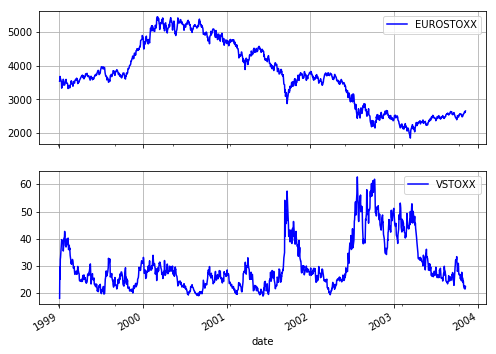

In [148]:
data.plot(subplots=True,grid=True,style='b',figsize=(8,6))

In [149]:
# plotting log returns
rets = np.log(data/data.shift(1))
rets.tail()

,EUROSTOXX,VSTOXX
date,,
2003-11-03,0.021746,-0.034690
2003-11-04,-0.001647,0.046332
2003-11-05,-0.006652,-0.004245
2003-11-06,0.006409,-0.046797
2003-11-07,0.011703,0.038218


In [150]:
rets =  rets.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae0f155990>,
      dtype=object)

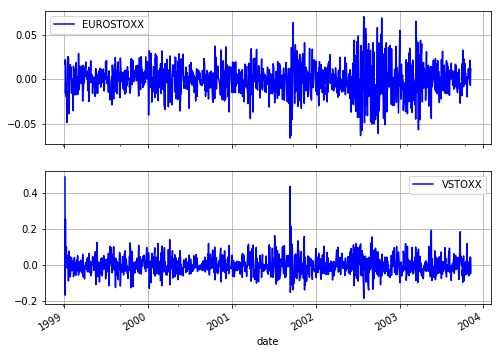

In [151]:
rets.plot(subplots=True,grid=True,style='b',figsize=(8,6))

In [152]:
#for regression analysis take EURO STOXX 50 returns as independent variable and VSTOXX returns as dependent variable
xdat = rets['EUROSTOXX'][1:]
ydat = rets['VSTOXX'][1:]

In [153]:
xdat=xdat.as_matrix()
ydat = ydat.as_matrix()

In [154]:
results = sm.OLS(ydat,xdat).fit()


# reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')
# type(reg1)

In [155]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1509.
Date:                Wed, 10 Oct 2018   Prob (F-statistic):          3.65e-216
Time:                        11:34:32   Log-Likelihood:                 2424.1
No. Observations:                1232   AIC:                            -4846.
Df Residuals:                    1231   BIC:                            -4841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1468      0.055    -38.851      0.000      -2.255      -2.038
==============================================================================
Omnibus:                      352.212   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2727.911
Skew:                           1.103   Prob(JB):                         0.00
Kurtosis:                       9.948   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.plot(xdat,ydat,'r')
ax=plt.axis()
x=np.linspace(ax[0],ax[1]+0.01)
plt.plot(x,)

In [83]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


/home/cassandra/Shikha/pythonvirtual/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


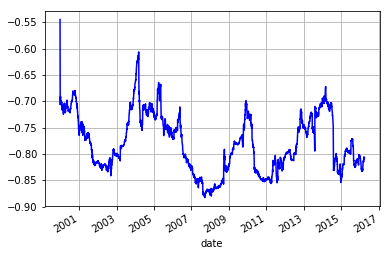

In [84]:
pd.rolling_corr(rets['EUROSTOXX'],rets['VSTOXX'],window=252).plot(grid=True,style='b')